# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

In [1]:
# The DST API wrapper
#%pip install git+https://github.com/alemartinello/dstapi

# A wrapper for multiple APIs with a pandas interface
#%pip install pandas-datareader

Imports and set magics:

In [2]:
import pandas as pd
import numpy as np
import ipywidgets as widgets

import datetime
import pandas_datareader 
from dstapi import DstApi

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

Importing data from DST through an API

In [3]:
ind = DstApi('LONS50') 

Getting a quick overview over the data

In [4]:
tabsum = ind.tablesummary(language='en')
display(tabsum)

Table LONS50: Earnings by age, sector, salary, salary earners, components, sex and time
Last update: 2023-11-29T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,ALDER1,11,TOT,"Age, total",60-,60 years and over,False
1,SEKTOR,7,1000,All sectors,1046,Corporations and organizations,False
2,AFLOEN,3,TIFA,All forms of pay,FAST,Fixed salary-earners,False
3,LONGRP,6,LTOT,Employee group total,ELE,Trainees,False
4,LØNMÅL,25,FORINKL,EARNINGS IN DKK PER HOUR WORKED,ANTAL,Number of fulltime employees in the earnings s...,False
5,KØN,3,MOK,"Men and women, total",K,Women,False
6,Tid,10,2013,2013,2022,2022,True


In [5]:
# The available values for a each variable: 
for variable in tabsum['variable name']:
   print(variable+':')
   display(ind.variable_levels(variable, language='en'))


ALDER1:


,id,text
0,TOT,"Age, total"
1,-19,Under 20 years
2,20-24,20-24 years
3,25-29,25-29 years
4,30-34,30-34 years
5,35-39,35-39 years
6,40-44,40-44 years
7,45-49,45-49 years
8,50-54,50-54 years
9,55-59,55-59 years


SEKTOR:


,id,text
0,1000,All sectors
1,1032,General government
2,1016,Government including social security funds
3,1018,Municipal and regional government total
4,1020,Regional government
5,1025,Municipal government
6,1046,Corporations and organizations


AFLOEN:


,id,text
0,TIFA,All forms of pay
1,TIME,Workers paid by the hour
2,FAST,Fixed salary-earners


LONGRP:


,id,text
0,LTOT,Employee group total
1,LED,General managers
2,VOK,Employees (exclusiv young people and trainees)
3,MED,"Employees, non-managerial level"
4,UNG,"Young people, 13-17 years"
5,ELE,Trainees


LØNMÅL:


,id,text
0,FORINKL,EARNINGS IN DKK PER HOUR WORKED
1,OVERB,Overtime payment in DKK per hour worked
2,SYGDOM,"Sickness with pay, etc. in DKK per hour worked"
3,GENE,Nuisance bonus in DKK per hour worked
4,GODE,Fringe benefits in DKK per hour worked
5,UREGEL,Irregular payments in DKK per hour worked
6,PENS,Pension including ATP in DKK per hour worked
7,BASIS,Basic earnings in DKK per hour worked
8,SFERIE,..Special holiday allowance in DKK per hour wo...
9,FERIE,..Holiday payments in DKK per hour worked


KØN:


,id,text
0,MOK,"Men and women, total"
1,M,Men
2,K,Women


Tid:


,id,text
0,2013,2013
1,2014,2014
2,2015,2015
3,2016,2016
4,2017,2017
5,2018,2018
6,2019,2019
7,2020,2020
8,2021,2021
9,2022,2022


In [6]:
# The _define_base_params -method gives us a nice template (selects all available data)
params = ind._define_base_params(language='en')
params

{'table': 'lons50',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'ALDER1', 'values': ['*']},
  {'code': 'SEKTOR', 'values': ['*']},
  {'code': 'AFLOEN', 'values': ['*']},
  {'code': 'LONGRP', 'values': ['*']},
  {'code': 'LØNMÅL', 'values': ['*']},
  {'code': 'KØN', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [7]:
params = {'table': 'lons50',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'ALDER1', 'values': ['20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-']},
  {'code': 'SEKTOR', 'values': ['1018', '1016', '1046']},
  {'code': 'AFLOEN', 'values': ['TIFA']},
  {'code': 'LONGRP', 'values': ['LTOT']},
  {'code': 'LØNMÅL', 'values': ['FORINKL']},
  {'code': 'KØN', 'values': ['MOK']},
  {'code': 'Tid', 'values': ['*']}]}


In [8]:
inc_api = ind.get_data(params=params)
inc_api.info()
inc_api.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ALDER1   270 non-null    object
 1   SEKTOR   270 non-null    object
 2   AFLOEN   270 non-null    object
 3   LONGRP   270 non-null    object
 4   LØNMÅL   270 non-null    object
 5   KØN      270 non-null    object
 6   TID      270 non-null    int64 
 7   INDHOLD  270 non-null    object
dtypes: int64(1), object(7)
memory usage: 17.0+ KB


,ALDER1,SEKTOR,AFLOEN,LONGRP,LØNMÅL,KØN,TID,INDHOLD
0,20-24 years,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,185.38
1,20-24 years,Municipal and regional government total,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,160.57
2,20-24 years,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,174.43
3,25-29 years,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,242.88
4,25-29 years,Municipal and regional government total,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,228.85


In [9]:
inc_api.sort_values(by=['ALDER1', 'TID', 'SEKTOR'], inplace=True)
inc_api.head(5)

,ALDER1,SEKTOR,AFLOEN,LONGRP,LØNMÅL,KØN,TID,INDHOLD
2,20-24 years,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,174.43
0,20-24 years,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,185.38
1,20-24 years,Municipal and regional government total,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,160.57
29,20-24 years,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2014,177.54
27,20-24 years,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2014,186.52


In [10]:
inc_api['INDHOLD'] = inc_api['INDHOLD'].astype(float)
print(inc_api['INDHOLD'].dtype)

float64


NR. 2 Data Set

In [11]:
ind1 = DstApi('LONS30') 

In [12]:
tabsum1 = ind1.tablesummary(language='en')
display(tabsum1)

Table LONS30: Earnings by region, sector, salary, salary earners, components, sex and time
Last update: 2023-11-29T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,OMRÅDE,6,000,All Denmark,081,Region Nordjylland,False
1,SEKTOR,7,1000,All sectors,1046,Corporations and organizations,False
2,AFLOEN,3,TIFA,All forms of pay,FAST,Fixed salary-earners,False
3,LONGRP,6,LTOT,Employee group total,ELE,Trainees,False
4,LØNMÅL,25,FORINKL,EARNINGS IN DKK PER HOUR WORKED,ANTAL,Number of fulltime employees in the earnings s...,False
5,KØN,3,MOK,"Men and women, total",K,Women,False
6,Tid,10,2013,2013,2022,2022,True


In [13]:
# The available values for a each variable: 
for variable in tabsum1['variable name']:
  print(variable+':')
  display(ind.variable_levels(variable, language='en'))

OMRÅDE:

                Error: The table does not seem to contain the requested variable.
                Check the spelling (variable names are case sensitive
                )


IndexError('list index out of range')

SEKTOR:


,id,text
0,1000,All sectors
1,1032,General government
2,1016,Government including social security funds
3,1018,Municipal and regional government total
4,1020,Regional government
5,1025,Municipal government
6,1046,Corporations and organizations


AFLOEN:


,id,text
0,TIFA,All forms of pay
1,TIME,Workers paid by the hour
2,FAST,Fixed salary-earners


LONGRP:


,id,text
0,LTOT,Employee group total
1,LED,General managers
2,VOK,Employees (exclusiv young people and trainees)
3,MED,"Employees, non-managerial level"
4,UNG,"Young people, 13-17 years"
5,ELE,Trainees


LØNMÅL:


,id,text
0,FORINKL,EARNINGS IN DKK PER HOUR WORKED
1,OVERB,Overtime payment in DKK per hour worked
2,SYGDOM,"Sickness with pay, etc. in DKK per hour worked"
3,GENE,Nuisance bonus in DKK per hour worked
4,GODE,Fringe benefits in DKK per hour worked
5,UREGEL,Irregular payments in DKK per hour worked
6,PENS,Pension including ATP in DKK per hour worked
7,BASIS,Basic earnings in DKK per hour worked
8,SFERIE,..Special holiday allowance in DKK per hour wo...
9,FERIE,..Holiday payments in DKK per hour worked


KØN:


,id,text
0,MOK,"Men and women, total"
1,M,Men
2,K,Women


Tid:


,id,text
0,2013,2013
1,2014,2014
2,2015,2015
3,2016,2016
4,2017,2017
5,2018,2018
6,2019,2019
7,2020,2020
8,2021,2021
9,2022,2022


In [14]:
# The _define_base_params -method gives us a nice template (selects all available data)
params1 = ind1._define_base_params(language='en')
params1

{'table': 'lons30',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'SEKTOR', 'values': ['*']},
  {'code': 'AFLOEN', 'values': ['*']},
  {'code': 'LONGRP', 'values': ['*']},
  {'code': 'LØNMÅL', 'values': ['*']},
  {'code': 'KØN', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [15]:
params1 = {'table': 'lons30',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'SEKTOR', 'values': ['1018', '1016', '1046']},
  {'code': 'AFLOEN', 'values': ['TIFA']},
  {'code': 'LONGRP', 'values': ['LTOT']},
  {'code': 'LØNMÅL', 'values': ['FORINKL']},
  {'code': 'KØN', 'values': ['MOK']},
  {'code': 'Tid', 'values': ['*']}]}

In [16]:
inc1_api = ind1.get_data(params=params1)
inc1_api.info()
inc1_api.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   OMRÅDE   180 non-null    object
 1   SEKTOR   180 non-null    object
 2   AFLOEN   180 non-null    object
 3   LONGRP   180 non-null    object
 4   LØNMÅL   180 non-null    object
 5   KØN      180 non-null    object
 6   TID      180 non-null    int64 
 7   INDHOLD  180 non-null    object
dtypes: int64(1), object(7)
memory usage: 11.4+ KB


,OMRÅDE,SEKTOR,AFLOEN,LONGRP,LØNMÅL,KØN,TID,INDHOLD
0,Region Syddanmark,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,294.24
1,All Denmark,Municipal and regional government total,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2017,292.60
2,Region Sjælland,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2017,281.77
3,All Denmark,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2016,306.22
4,Region Midtjylland,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2016,288.56


In [17]:
inc1_api.sort_values(by=['OMRÅDE', 'TID', 'SEKTOR'], inplace=True)
inc1_api.head(5)

,OMRÅDE,SEKTOR,AFLOEN,LONGRP,LØNMÅL,KØN,TID,INDHOLD
8,All Denmark,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,297.40
22,All Denmark,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,309.14
46,All Denmark,Municipal and regional government total,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,270.49
157,All Denmark,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2014,300.91
158,All Denmark,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2014,313.27


In [18]:
inc1_api['INDHOLD'] = inc1_api['INDHOLD'].astype(float)
print(inc1_api['INDHOLD'].dtype)

float64


Cleaning data

In [19]:
#Dropping irrelevant variables from first data set
Inc_age = inc_api.drop(['LONGRP', 'LØNMÅL', 'AFLOEN','KØN'],axis=1) # Drop irrelevant variables
Inc_age.head(10)

,ALDER1,SEKTOR,TID,INDHOLD
2,20-24 years,Corporations and organizations,2013,174.43
0,20-24 years,Government including social security funds,2013,185.38
1,20-24 years,Municipal and regional government total,2013,160.57
29,20-24 years,Corporations and organizations,2014,177.54
27,20-24 years,Government including social security funds,2014,186.52
28,20-24 years,Municipal and regional government total,2014,165.41
56,20-24 years,Corporations and organizations,2015,180.73
54,20-24 years,Government including social security funds,2015,189.93
55,20-24 years,Municipal and regional government total,2015,168.73
83,20-24 years,Corporations and organizations,2016,182.76


In [20]:
#Dropping irrelevant variables from first data set
Inc_area = inc1_api.drop(['LONGRP', 'LØNMÅL', 'AFLOEN','KØN'],axis=1) # Drop irrelevant variables
Inc_area.head(10)

,OMRÅDE,SEKTOR,TID,INDHOLD
8,All Denmark,Corporations and organizations,2013,297.40
22,All Denmark,Government including social security funds,2013,309.14
46,All Denmark,Municipal and regional government total,2013,270.49
157,All Denmark,Corporations and organizations,2014,300.91
158,All Denmark,Government including social security funds,2014,313.27
148,All Denmark,Municipal and regional government total,2014,276.19
133,All Denmark,Corporations and organizations,2015,304.53
130,All Denmark,Government including social security funds,2015,315.47
154,All Denmark,Municipal and regional government total,2015,281.33
3,All Denmark,Corporations and organizations,2016,306.22


In [21]:
# Clean the datasets
# For now, we will simply drop any rows with missing values and remove duplicates. 
# You may choose to fill missing values based on your data context.

Inc_age_cleaned = Inc_age.dropna().drop_duplicates()
Inc_area_cleaned = Inc_area.dropna().drop_duplicates()

# Ensure that 'TID' is of datetime type and 'INDHOLD' is float for both datasets
Inc_age_cleaned['TID'] = pd.to_datetime(Inc_age_cleaned['TID'])
Inc_area_cleaned['TID'] = pd.to_datetime(Inc_area_cleaned['TID'])



In [22]:
# Merge datasets on common 'TID' and 'SEKTOR' assuming 'SEKTOR' exists in both.
# We are using an inner join here, meaning we only keep rows that match in both datasets.
merged_df = pd.merge(Inc_age_cleaned, Inc_area_cleaned, on=['TID', 'SEKTOR'], suffixes=('_age', '_area'))

# Check the merged data
print(merged_df.head())

        ALDER1                          SEKTOR                           TID  \
0  20-24 years  Corporations and organizations 1970-01-01 00:00:00.000002013   
1  20-24 years  Corporations and organizations 1970-01-01 00:00:00.000002013   
2  20-24 years  Corporations and organizations 1970-01-01 00:00:00.000002013   
3  20-24 years  Corporations and organizations 1970-01-01 00:00:00.000002013   
4  20-24 years  Corporations and organizations 1970-01-01 00:00:00.000002013   

   INDHOLD_age              OMRÅDE  INDHOLD_area  
0       174.43         All Denmark        297.40  
1       174.43  Region Hovedstaden        333.24  
2       174.43  Region Midtjylland        279.64  
3       174.43  Region Nordjylland        263.39  
4       174.43     Region Sjælland        269.16  


Analysis 

In [26]:
most_recent_year_age = Inc_age_cleaned['TID'].dt.year.max()
most_recent_year_area = Inc_area_cleaned['TID'].dt.year.max()

print("Most recent year in age dataset:", most_recent_year_age)
print("Most recent year in area dataset:", most_recent_year_area)

Most recent year in age dataset: 1970
Most recent year in area dataset: 1970


<Figure size 1600x900 with 0 Axes>

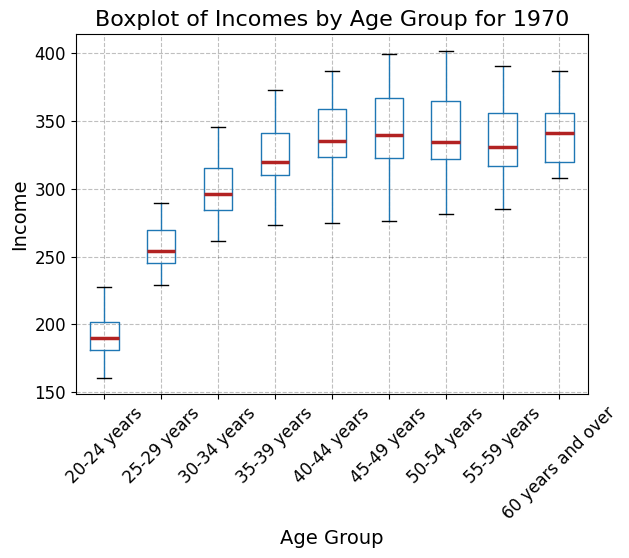

In [23]:
# Select the most recent year available in the dataset
most_recent_year = Inc_age_cleaned['TID'].dt.year.max()

# Filter the datasets for the most recent year
Inc_age_recent = Inc_age_cleaned[Inc_age_cleaned['TID'].dt.year == most_recent_year]

# Define a custom color for the median
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')

# Boxplot for age groups
plt.figure(figsize=(16, 9))  # Increased figure size for better readability
boxplot_age = Inc_age_recent.boxplot(by='ALDER1', column='INDHOLD', grid=True, showfliers=False, medianprops=medianprops)
plt.title(f'Boxplot of Incomes by Age Group for {most_recent_year}', fontsize=16)
plt.suptitle('')  # Suppress the automatic title to avoid redundancy
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tick_params(labelsize=12)  # Increase label font size
plt.show()


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [24]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [25]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

NameError: name 'venn2' is not defined

<Figure size 1500x700 with 0 Axes>

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.